# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="/home/anikait/udacity/deep-reinforcement-learning/p1_navigation/Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
%load_ext autoreload
%autoreload 2

from dqn_model import DqnModel
from dqn_agent import ReplayBuffer, EnvWrapper, Agent
from dqn_agent import getBatch

GAMMA = 0.99
BATCH_SIZE = 64
REPLAY_SIZE = int(1e5)
LEARNING_RATE = 5e-4
SYNC_TARGET_FRAMES = 10
REPLAY_START_SIZE = int(1e4)

EPSILON_DECR = 1e-5
EPSILON_START = 1.0
EPSILON_FINAL = 0.01
TARGET_AVERAGE_REWARD = 13.0

In [6]:
import torch
import torch.optim as optim
from dqn_agent import dqn_agent

env_wrapper = EnvWrapper(env, brain_name, action_size, train_mode=True)
replay_buffer = ReplayBuffer(REPLAY_SIZE)
model = DqnModel(state_size, action_size, [128, 64]).cuda()
target_model = DqnModel(state_size, action_size, [128, 64]).cuda()
device = torch.device('cuda')
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
MAX_EPISODES = 5000

In [7]:
env_wrapper = EnvWrapper(env, brain_name, action_size, train_mode=True)
replay_buffer = ReplayBuffer(REPLAY_SIZE)
model = DqnModel(state_size, action_size, [128, 64]).cuda()
target_model = DqnModel(state_size, action_size, [128, 64]).cuda()
device = torch.device('cuda')
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
MAX_EPISODES = 5000

agent = Agent(
    env_wrapper, replay_buffer, model, target_model,
    device, optimizer, GAMMA, BATCH_SIZE, REPLAY_START_SIZE, 
    double_dqn=True, soft_update=True, target_update_steps=4
)
n_episodes, average_reward, episode_rewards = dqn_agent(
    agent, 'model_double_dqn_new.pth', n_episodes=MAX_EPISODES,
    target_reward=13.0
)
if average_reward:
    print('Solved in {0} episodes with a score of {1:.3f}'.format(
        n_episodes, average_reward)
    )
else:
    print('Failed to solve in {}'.format(MAX_EPISODES))

Episode 100, average reward 2.450
Episode 200, average reward 8.010
Episode 300, average reward 11.060
Episode 400, average reward 12.540

Solved in 426 episodes!	 Avg Score: 13.13
Solved in 426 episodes with a score of 13.130


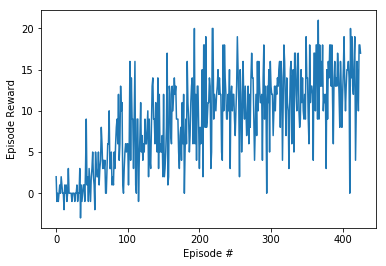

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(episode_rewards)), episode_rewards)
plt.ylabel('Episode Reward')
plt.xlabel('Episode #')
plt.show()

In [ ]:
env.close()